In [1]:
import pandas as pd
import numpy as np
import string
import re
import nltk
import sklearn

In [2]:
df = pd.read_csv(r'C:\Users\ANURAG DHAWAN\Desktop\PROJECT\Datasets\amazon_reviews.csv')
df.tail()

,Unnamed: 0,Customer Name,Title,Rating,Review
6879,295,Ruth p,NaN,3.0 out of 5 stars,Had hard time trying to connect .had to retu...
6880,296,Dennis meadows,NaN,3.0 out of 5 stars,Fied problem
6881,297,Cyril A. Furtado,NaN,3.0 out of 5 stars,OK was a bigger size than expected
6882,298,Victor Moreno P,NaN,3.0 out of 5 stars,Works
6883,299,Jonathan Stanley,NaN,3.0 out of 5 stars,2 defective units of 5 now


In [3]:
df = df.drop(['Unnamed: 0','Customer Name','Title'],axis=1)
pd.set_option('display.max_colwidth',100)

nltk.download('stopwords')
df.head()

[nltk_data] Downloading package stopwords to C:\Users\ANURAG
[nltk_data]     DHAWAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Rating,Review
0,5.0 out of 5 stars,Brilliant..I have uploaded some pics of selfie as well as Portrait shot of near by shot.What i...
1,4.0 out of 5 stars,I used several phone except like this type of phone but this phone is very silky smoothy.90hz ...
2,2.0 out of 5 stars,Average phone from one plus but surprisingly very bad battery life though good battery on pape...
3,1.0 out of 5 stars,Display has green tint issue..display looks like a very cheap quality phone. Want to return th...
4,3.0 out of 5 stars,OnePlus Nord is a very competitive smartphone in this segment.Pros.Device is pretty impressive...


In [4]:
def data_clean(text):
    text=str(text)
    translator= str.maketrans(string.punctuation, ' '*len(string.punctuation))
    text = text.translate(translator)
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    text = text.strip()
    tokens = re.split("\W+",text)
    stopwords = nltk.corpus.stopwords.words('english')
    text = [word.lower() for word in tokens if word not in stopwords]
    #text = [i for i in text if not i.isdigit()]
    return text

In [5]:
df['clean_review']= df['Review'].apply(lambda x: data_clean(x))
df.head()

,Rating,Review,clean_review
0,5.0 out of 5 stars,Brilliant..I have uploaded some pics of selfie as well as Portrait shot of near by shot.What i...,"[brilliant, i, uploaded, pics, selfie, well, portrait, shot, near, shot, what, loved, phone, goo..."
1,4.0 out of 5 stars,I used several phone except like this type of phone but this phone is very silky smoothy.90hz ...,"[i, used, several, phone, except, like, type, phone, phone, silky, smoothy, 90hz, refresh, rate,..."
2,2.0 out of 5 stars,Average phone from one plus but surprisingly very bad battery life though good battery on pape...,"[average, phone, one, plus, surprisingly, bad, battery, life, though, good, battery, paper, disa..."
3,1.0 out of 5 stars,Display has green tint issue..display looks like a very cheap quality phone. Want to return th...,"[display, green, tint, issue, display, looks, like, cheap, quality, phone, want, return, phone, ..."
4,3.0 out of 5 stars,OnePlus Nord is a very competitive smartphone in this segment.Pros.Device is pretty impressive...,"[oneplus, nord, competitive, smartphone, segment, pros, device, pretty, impressive, looks, premi..."


In [6]:
wn = nltk.WordNetLemmatizer()
def lemmatization(tokens):
    text = [wn.lemmatize(word) for word in tokens]
    return ' '.join(word for word in text)

df['lemmatized'] = df['clean_review'].apply(lambda x: lemmatization(x))
df.head()

,Rating,Review,clean_review,lemmatized
0,5.0 out of 5 stars,Brilliant..I have uploaded some pics of selfie as well as Portrait shot of near by shot.What i...,"[brilliant, i, uploaded, pics, selfie, well, portrait, shot, near, shot, what, loved, phone, goo...",brilliant i uploaded pic selfie well portrait shot near shot what loved phone good sensor it fir...
1,4.0 out of 5 stars,I used several phone except like this type of phone but this phone is very silky smoothy.90hz ...,"[i, used, several, phone, except, like, type, phone, phone, silky, smoothy, 90hz, refresh, rate,...",i used several phone except like type phone phone silky smoothy 90hz refresh rate speed good smo...
2,2.0 out of 5 stars,Average phone from one plus but surprisingly very bad battery life though good battery on pape...,"[average, phone, one, plus, surprisingly, bad, battery, life, though, good, battery, paper, disa...",average phone one plus surprisingly bad battery life though good battery paper disappointed
3,1.0 out of 5 stars,Display has green tint issue..display looks like a very cheap quality phone. Want to return th...,"[display, green, tint, issue, display, looks, like, cheap, quality, phone, want, return, phone, ...",display green tint issue display look like cheap quality phone want return phone amazon offering...
4,3.0 out of 5 stars,OnePlus Nord is a very competitive smartphone in this segment.Pros.Device is pretty impressive...,"[oneplus, nord, competitive, smartphone, segment, pros, device, pretty, impressive, looks, premi...",oneplus nord competitive smartphone segment pro device pretty impressive look premium 1 screen l...


In [7]:
from tensorflow.keras.layers import Embedding,Dropout,SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow import keras

In [8]:
def feedback(text):
    if(int(text[0])>3):
        return 3
    if(int(text[0])<3):
        return 1
    else:
        return 2
df['feedback'] = df['Rating'].apply(lambda x : feedback(x))    
df.head()

,Rating,Review,clean_review,lemmatized,feedback
0,5.0 out of 5 stars,Brilliant..I have uploaded some pics of selfie as well as Portrait shot of near by shot.What i...,"[brilliant, i, uploaded, pics, selfie, well, portrait, shot, near, shot, what, loved, phone, goo...",brilliant i uploaded pic selfie well portrait shot near shot what loved phone good sensor it fir...,3
1,4.0 out of 5 stars,I used several phone except like this type of phone but this phone is very silky smoothy.90hz ...,"[i, used, several, phone, except, like, type, phone, phone, silky, smoothy, 90hz, refresh, rate,...",i used several phone except like type phone phone silky smoothy 90hz refresh rate speed good smo...,3
2,2.0 out of 5 stars,Average phone from one plus but surprisingly very bad battery life though good battery on pape...,"[average, phone, one, plus, surprisingly, bad, battery, life, though, good, battery, paper, disa...",average phone one plus surprisingly bad battery life though good battery paper disappointed,1
3,1.0 out of 5 stars,Display has green tint issue..display looks like a very cheap quality phone. Want to return th...,"[display, green, tint, issue, display, looks, like, cheap, quality, phone, want, return, phone, ...",display green tint issue display look like cheap quality phone want return phone amazon offering...,1
4,3.0 out of 5 stars,OnePlus Nord is a very competitive smartphone in this segment.Pros.Device is pretty impressive...,"[oneplus, nord, competitive, smartphone, segment, pros, device, pretty, impressive, looks, premi...",oneplus nord competitive smartphone segment pro device pretty impressive look premium 1 screen l...,2


3-->positive ; 2-->neutral ; 1-->negative

In [9]:
x = df.lemmatized
y=df.feedback
print(x.shape)
print(y.shape)

(6884,)
(6884,)


In [10]:
Y = pd.get_dummies(df['feedback']).values
print( Y.shape)

(6884, 3)


In [11]:
corpus=[]
for sentence in x:
    corpus.append(sentence)

type(corpus)

list

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(corpus, Y, test_size=0.1, random_state=42 , stratify = Y)

In [13]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=50000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True ,oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=250)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=250)


voc_size = 50000
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

voc_size = 50000
sent_length=200
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

In [47]:
voc_size = 50000
sent_length=250
embedding_vector_features=100
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100,dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(3,activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.0002)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 99        
Total params: 5,083,731
Trainable params: 5,083,731
Non-trainable params: 0
_________________________________________________________________
None


X_final=np.array(embedded_docs)
y_final=np.array(Y)

print(X_final.shape)
print(Y)

In [48]:
model_hist=model.fit(training_padded,y_train,epochs=20, validation_data=(testing_padded, y_test) ,batch_size=128)

Epoch 1/20
49/49 [==============================] - 82s 2s/step - loss: 1.4053 - accuracy: 0.2588 - val_loss: 1.0849 - val_accuracy: 0.4586
Epoch 2/20
49/49 [==============================] - 87s 2s/step - loss: 1.0679 - accuracy: 0.4531 - val_loss: 1.0646 - val_accuracy: 0.4586
Epoch 3/20
49/49 [==============================] - 85s 2s/step - loss: 1.0645 - accuracy: 0.4578 - val_loss: 1.0640 - val_accuracy: 0.4586
Epoch 4/20
49/49 [==============================] - 84s 2s/step - loss: 1.0626 - accuracy: 0.4578 - val_loss: 1.0620 - val_accuracy: 0.4586
Epoch 5/20
49/49 [==============================] - 84s 2s/step - loss: 1.0596 - accuracy: 0.4578 - val_loss: 1.0577 - val_accuracy: 0.4586
Epoch 6/20
49/49 [==============================] - 85s 2s/step - loss: 1.0537 - accuracy: 0.4578 - val_loss: 1.0506 - val_accuracy: 0.4586
Epoch 7/20
49/49 [==============================] - 87s 2s/step - loss: 1.0298 - accuracy: 0.4694 - val_loss: 0.9983 - val_accuracy: 0.4586
Epoch 8/20
49/49 [==

df['feedback'].value_counts()

accr = model.evaluate(X_test,y_test)

In [49]:
new_complaint = ['While Alexa is smart and intelligent , it cannot answer complex questions because it does not have Google Search ! Google mini has the brains of the best search engine on earth ! Google mini any day ! Only reason to buy it would be if you had a prime music account and you had to play music through it !']
seq = tokenizer.texts_to_sequences(new_complaint)
#onehot_repr=[one_hot(words,voc_size)for words in new_complaint ] 
padded = pad_sequences(seq, maxlen=200)
pred = model.predict(padded)
labels = ['1','2','3']
print(pred, labels[np.argmax(pred)])

[[0.29439697 0.596984   0.108619  ]] 2


Y[:5]

y_pred = model.predict(X_test)
y_pred = y_pred

y_pred[:5]

y_test[:5]

In [18]:
import matplotlib.pyplot as plt


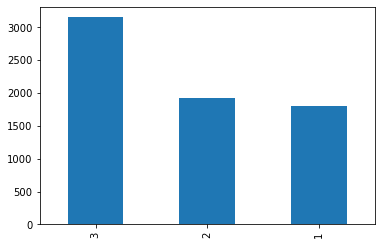

In [19]:
bar = y.value_counts()
bar.plot(kind='bar')

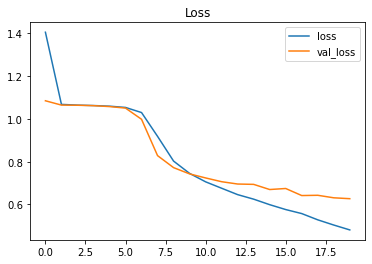

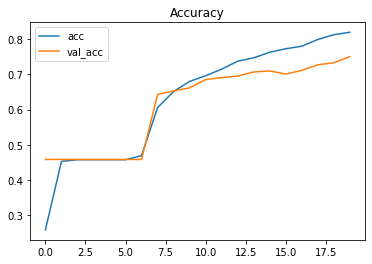

In [50]:
plt.plot(model_hist.history['loss'], label = 'loss')
plt.plot(model_hist.history['val_loss'], label = 'val_loss')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(model_hist.history['accuracy'], label = 'acc')
plt.plot(model_hist.history['val_accuracy'], label = 'val_acc')
plt.title('Accuracy')
plt.legend()
plt.show()

In [51]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(testing_padded)
y_pred_single = np.argmax(y_pred, axis=1)
y = np.argmax(y_test,axis=1)
cm = confusion_matrix(y,y_pred_single)
cm

array([[121,  35,  24],
       [ 43, 115,  35],
       [ 13,  22, 281]], dtype=int64)

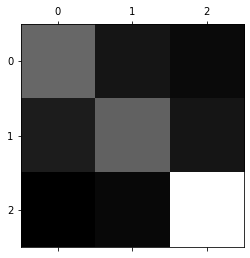

In [52]:
plt.matshow(cm,cmap=plt.cm.gray)

In [53]:
model.evaluate(testing_padded,y_test)

22/22 [==============================] - 1s 49ms/step - loss: 0.6270 - accuracy: 0.7504


[0.6269980669021606, 0.7503628730773926]